In [1]:
# Import libs

from pycaret.datasets import get_data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mlflow

In [2]:
from pycaret.clustering import *

In [3]:
all_datasets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [4]:
# Grab data

df = get_data('pokemon')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
# Drop useless colums

df = df.drop(['#', 'Name'], axis = 1)

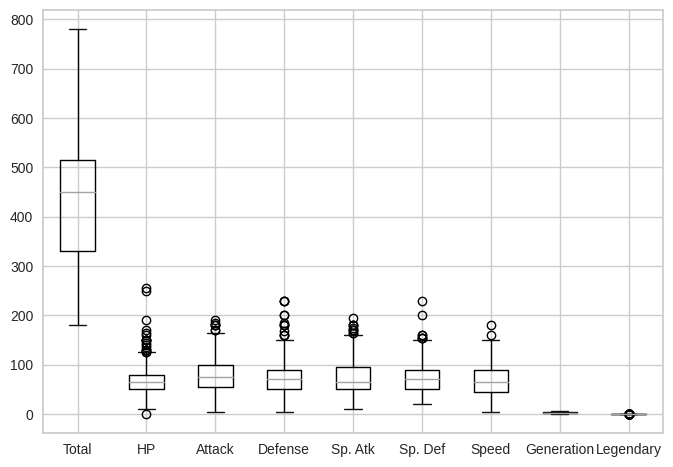

In [7]:
# Show boxplots

df.boxplot()
plt.show()

In [8]:
# Make encoder categorical features with numbrs 

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for i in ['Type 1', 'Type 2', 'Legendary']:
    df[i] = encoder.fit_transform(df[i])

df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,9,13,318,45,49,49,65,65,45,1,0
1,9,13,405,60,62,63,80,80,60,1,0
2,9,13,525,80,82,83,100,100,80,1,0
3,9,13,625,80,100,123,122,120,80,1,0
4,6,18,309,39,52,43,60,50,65,1,0


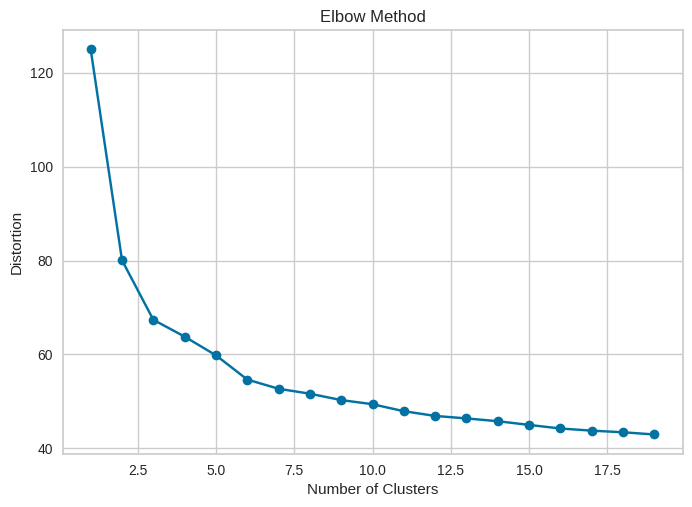

2024/03/02 16:59:45 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/03/02 16:59:45 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [9]:
# Show elbow method

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

distortions = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeans.cluster_centers_, 'euclidean'), axis = 1)) / df.shape[0])


plt.plot(range(1, 20), distortions, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [10]:
# Enable mlflow autologgining

mlflow.autolog()

2024/03/02 16:59:45 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/03/02 16:59:45 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [11]:
from pycaret.clustering import *

s = setup(df, session_id = 1212,
           log_experiment = True, experiment_name = 'pockemon_0', normalize = True)

,Description,Value
0,Session id,1212
1,Original data shape,"(800, 11)"
2,Transformed data shape,"(800, 11)"
3,Numeric features,11
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


2024/03/02 16:59:46 INFO mlflow.tracking.fluent: Experiment with name 'pockemon_0' does not exist. Creating a new experiment.


In [12]:
# Fit model

model = create_model('kmeans')

# save metrics cause mlflow for some reason do not want do it himself
metrics_dict = pull()
for metric_name, metric_value in metrics_dict.items():
    numeric_value = metric_value.values[0]

    mlflow.log_metrics({metric_name: numeric_value})

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1415,172.6402,1.8652,0,0,0


In [13]:
# Try some others posible models...

s = setup(df, session_id = 1212,
           log_experiment = True, experiment_name = 'pockemon_1', normalize = True)
model = create_model('ap')

metrics_dict = pull()
for metric_name, metric_value in metrics_dict.items():
    numeric_value = metric_value.values[0]

    mlflow.log_metrics({metric_name: numeric_value})

,Description,Value
0,Session id,1212
1,Original data shape,"(800, 11)"
2,Transformed data shape,"(800, 11)"
3,Numeric features,11
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


2024/03/02 16:59:51 INFO mlflow.tracking.fluent: Experiment with name 'pockemon_1' does not exist. Creating a new experiment.


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1231,42.8682,1.5406,0,0,0


In [14]:
s = setup(df, session_id = 1212,
           log_experiment = True, experiment_name = 'pockemon_2', normalize = True)

model = create_model('meanshift')

metrics_dict = pull()
for metric_name, metric_value in metrics_dict.items():
    numeric_value = metric_value.values[0]

    mlflow.log_metrics({metric_name: numeric_value})

,Description,Value
0,Session id,1212
1,Original data shape,"(800, 11)"
2,Transformed data shape,"(800, 11)"
3,Numeric features,11
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


2024/03/02 16:59:56 INFO mlflow.tracking.fluent: Experiment with name 'pockemon_2' does not exist. Creating a new experiment.


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3428,71.5688,0.9140,0,0,0


In [15]:
s = setup(df, session_id = 1212,
           log_experiment = True, experiment_name = 'pockemon_3', normalize = True)

model = create_model('sc')

metrics_dict = pull()
for metric_name, metric_value in metrics_dict.items():
    numeric_value = metric_value.values[0]

    mlflow.log_metrics({metric_name: numeric_value})

,Description,Value
0,Session id,1212
1,Original data shape,"(800, 11)"
2,Transformed data shape,"(800, 11)"
3,Numeric features,11
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


2024/03/02 17:00:04 INFO mlflow.tracking.fluent: Experiment with name 'pockemon_3' does not exist. Creating a new experiment.


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2559,65.8391,0.8391,0,0,0


2024/03/02 17:00:08 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [16]:
s = setup(df, session_id = 1212,
           log_experiment = True, experiment_name = 'pockemon_4', normalize = True)

model = create_model('hclust')

metrics_dict = pull()
for metric_name, metric_value in metrics_dict.items():
    numeric_value = metric_value.values[0]

    mlflow.log_metrics({metric_name: numeric_value})

,Description,Value
0,Session id,1212
1,Original data shape,"(800, 11)"
2,Transformed data shape,"(800, 11)"
3,Numeric features,11
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


2024/03/02 17:00:08 INFO mlflow.tracking.fluent: Experiment with name 'pockemon_4' does not exist. Creating a new experiment.


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1522,166.9944,2.2025,0,0,0


2024/03/02 17:00:12 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [17]:
s = setup(df, session_id = 1212,
           log_experiment = True, experiment_name = 'pockemon_5', normalize = True)

model = create_model('dbscan')

metrics_dict = pull()
for metric_name, metric_value in metrics_dict.items():
    numeric_value = metric_value.values[0]

    mlflow.log_metrics({metric_name: numeric_value})

,Description,Value
0,Session id,1212
1,Original data shape,"(800, 11)"
2,Transformed data shape,"(800, 11)"
3,Numeric features,11
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


2024/03/02 17:00:13 INFO mlflow.tracking.fluent: Experiment with name 'pockemon_5' does not exist. Creating a new experiment.


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


2024/03/02 17:00:16 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [18]:
s = setup(df, session_id = 1212,
           log_experiment = True, experiment_name = 'pockemon_6', normalize = True)

model = create_model('optics')

metrics_dict = pull()
for metric_name, metric_value in metrics_dict.items():
    numeric_value = metric_value.values[0]

    mlflow.log_metrics({metric_name: numeric_value})

,Description,Value
0,Session id,1212
1,Original data shape,"(800, 11)"
2,Transformed data shape,"(800, 11)"
3,Numeric features,11
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


2024/03/02 17:00:17 INFO mlflow.tracking.fluent: Experiment with name 'pockemon_6' does not exist. Creating a new experiment.


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.3132,8.4923,1.4712,0,0,0


2024/03/02 17:00:32 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [19]:
s = setup(df, session_id = 1212,
           log_experiment = True, experiment_name = 'pockemon_7', normalize = True)

model = create_model('birch')

metrics_dict = pull()
for metric_name, metric_value in metrics_dict.items():
    numeric_value = metric_value.values[0]

    mlflow.log_metrics({metric_name: numeric_value})

,Description,Value
0,Session id,1212
1,Original data shape,"(800, 11)"
2,Transformed data shape,"(800, 11)"
3,Numeric features,11
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


2024/03/02 17:00:32 INFO mlflow.tracking.fluent: Experiment with name 'pockemon_7' does not exist. Creating a new experiment.


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1585,170.6474,2.1282,0,0,0


In [25]:
from pycaret.clustering import *

s = setup(df, session_id = 1212,
           log_experiment = True, experiment_name = 'pockemon_8', normalize = True)

,Description,Value
0,Session id,1212
1,Original data shape,"(800, 11)"
2,Transformed data shape,"(800, 11)"
3,Numeric features,11
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [26]:
# Try 6 clusters

model = create_model('kmeans', num_clusters = 6)

metrics_dict = pull()
for metric_name, metric_value in metrics_dict.items():
    numeric_value = metric_value.values[0]

    mlflow.log_metrics({metric_name: numeric_value})

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1362,141.6419,1.9959,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [27]:
s = setup(df, session_id = 1212,
           log_experiment = True, experiment_name = 'pockemon_9', normalize = True)

model = create_model('birch', num_clusters = 6)

metrics_dict = pull()
for metric_name, metric_value in metrics_dict.items():
    numeric_value = metric_value.values[0]

    mlflow.log_metrics({metric_name: numeric_value})

,Description,Value
0,Session id,1212
1,Original data shape,"(800, 11)"
2,Transformed data shape,"(800, 11)"
3,Numeric features,11
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


2024/03/02 17:02:23 INFO mlflow.tracking.fluent: Experiment with name 'pockemon_9' does not exist. Creating a new experiment.


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1245,125.6700,2.0817,0,0,0


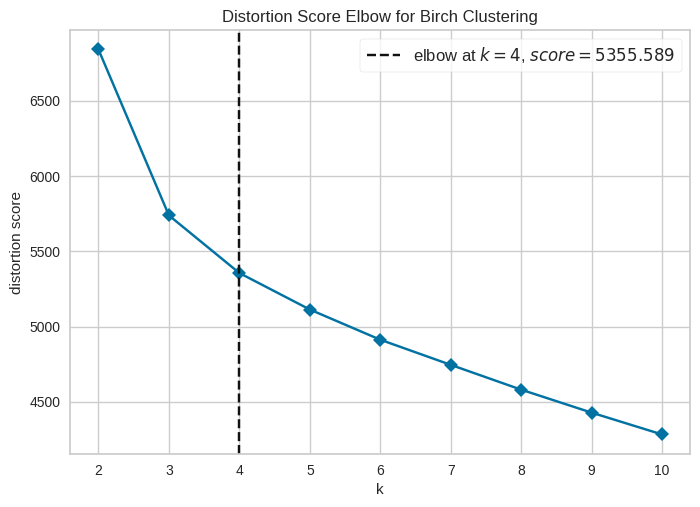

In [28]:
# plot elbow with pycaret
# Seems that there are 4 clusters...

plot_model(model, plot = 'elbow')

2024-03-02 17:03:06.255682: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-02 17:03:06.879745: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-02 17:03:06.888976: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-02 17:03:08.923592: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024/03/02 17:03:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/03/02 17:03:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


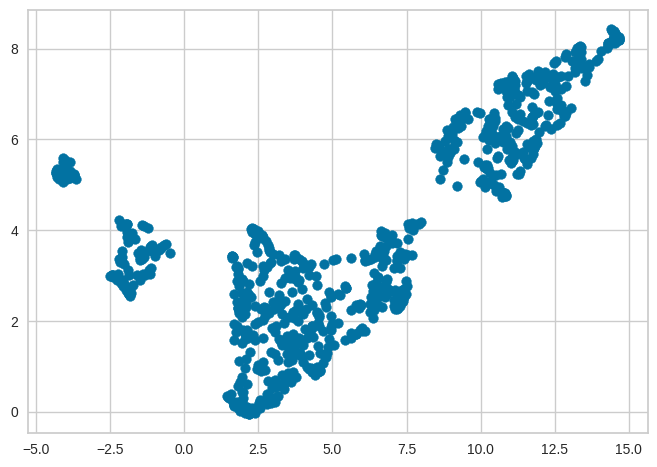

In [29]:
# applay umap to squeeze space

import umap

uMap = umap.UMAP()
df_umap = uMap.fit_transform(df.copy())

plt.scatter(df_umap[:, 0], df_umap[:, 1])
plt.show()

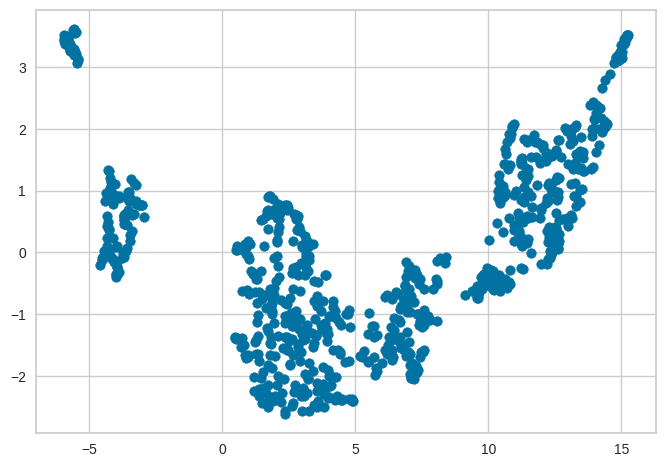

In [30]:
# And squeeze to 2 dims

uMap = umap.UMAP(n_components = 2)
df_umap = uMap.fit_transform(df.copy())

plt.scatter(df_umap[:, 0], df_umap[:, 1])
plt.show()

In [31]:
# Scale features with StandardScaler

from sklearn.preprocessing import StandardScaler

sclaer = StandardScaler()
df_umap = sclaer.fit_transform(df_umap)

In [32]:
# Tell pycarm do not preprocess my data, i do it myself

s = setup(df, session_id = 1212,  normalize = False, preprocess = False,
           log_experiment = True, experiment_name = 'pockemon_10')

model = create_model('kmeans', num_clusters = 4)

metrics_dict = pull()
for metric_name, metric_value in metrics_dict.items():
    numeric_value = metric_value.values[0]

    mlflow.log_metrics({metric_name: numeric_value})

,Description,Value
0,Session id,1212
1,Original data shape,"(800, 11)"
2,Transformed data shape,"(800, 11)"
3,Numeric features,11


2024/03/02 17:03:27 INFO mlflow.tracking.fluent: Experiment with name 'pockemon_10' does not exist. Creating a new experiment.


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3289,926.8205,1.0261,0,0,0


In [33]:
# Get better metrics...

s = setup(df, session_id = 1212,  normalize = False, preprocess = False,
           log_experiment = True, experiment_name = 'pockemon_11')

model = create_model('birch', num_clusters = 4)

metrics_dict = pull()
for metric_name, metric_value in metrics_dict.items():
    numeric_value = metric_value.values[0]

    mlflow.log_metrics({metric_name: numeric_value})

,Description,Value
0,Session id,1212
1,Original data shape,"(800, 11)"
2,Transformed data shape,"(800, 11)"
3,Numeric features,11


2024/03/02 17:03:34 INFO mlflow.tracking.fluent: Experiment with name 'pockemon_11' does not exist. Creating a new experiment.


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2965,851.5435,1.0891,0,0,0


In [34]:
s = setup(df, session_id = 1212,  normalize = False, preprocess = False,
           log_experiment = True, experiment_name = 'pockemon_10')

model = create_model('kmeans', num_clusters = 4)

metrics_dict = pull()
for metric_name, metric_value in metrics_dict.items():
    numeric_value = metric_value.values[0]

    mlflow.log_metrics({metric_name: numeric_value})

,Description,Value
0,Session id,1212
1,Original data shape,"(800, 11)"
2,Transformed data shape,"(800, 11)"
3,Numeric features,11


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3289,926.8205,1.0261,0,0,0


In [35]:
# Show clusters in 2Dims 

plot_model(model, plot = 'cluster')

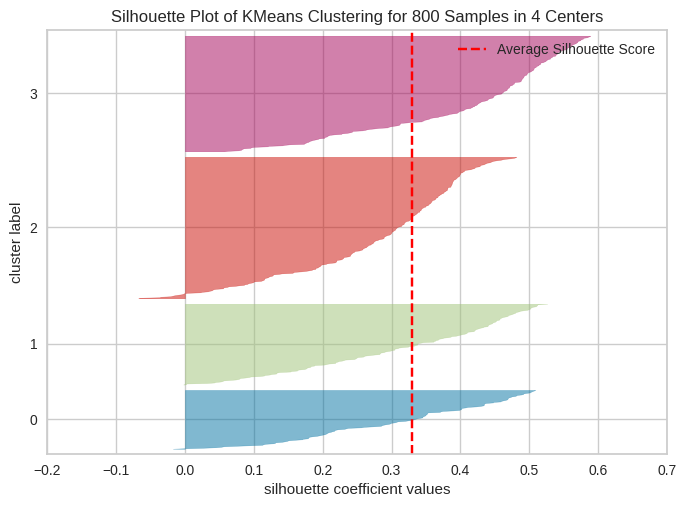

In [36]:
plot_model(model, plot = 'silhouette')

And show mlflow screenshot

![](Clustering_AutoML.png)